# Opplegg 1 - Tilfeldige Tall og Simuleringer

Tilfeldighet er kjempeviktig i programmering. Tenk deg for eksempel om du skal lage et dataspill, det hadde være ganske begrenset hva slags spill du kunne laget om du ikke kan inkludere tilfeldige elementer. Men det er ikke bare for lek og morro at tilfeldighet er viktig, vi kan også bruke tilfeldighet for å simulere det som skjer i virkeligheten - på denne måten kan programmering hjelpe oss å forstå sannsynligheter i mange forskjellige situasjoner.

**Plan** 

Dette opplegget inneholder informasjon om hvordan vi kan generere tilfeldige tall i programmene våre, å se hvordan dette kan brukes til å lage enkle spill og løse noen matematiske problemer. Opplegget avsluttes med en gjennomgang av Monty Hall problemet, og viser hvordan dette kan løses med datasimuleringer.

**Kompetansemål**

* **Matematikk**
    1. Finne og diskutere sannsyn gjennom eksperimentering, simulering og berekning i dagligdagse samanhengar og spel
    2. Bruke regneark og graftegner til å utforske tall og variabler og presentere resultatene
    3. Beskrive utfallsrom og uttrykkje sannsyn som brøk, prosent og desimaltal

<img src="fig/terninger.png" width=250></img>

## Generere Tilfeldige Tall

Det første vi skal se på er hvordan vi kan lage tilfeldige tall. Den kanskje enkleste kommandoen vi skal bruke heter `randint()`. Navnet er litt vanskelig, men *randint* er en sammensetning av *random integer*, der *random* betyr tilfeldig på engelsk, og *integer* betyr heltall, funksjonen gir oss altså et tilfeldig heltall. Når vi kaller på `randint()` må vi si noe om hvor mange muligheter det skal være. La oss se på et eksempel.

### Myntkast

Vi begynner med å se på myntkast, for eksempel for å finne ut hvem som starter i en fotballkamp. Vi kaster en mynt i været og tar den imot og ser hvilken side som kom opp. Mynten har to sider, så det er to mulige utfall, som vi kaller *kron* eller *mynt*. Hvis vi ønsker å gjennskape myntkast i programmet vårt kaster vi da `randint(2)`, siden vi har to mulige utfall.
<img src="fig/myntkast.png" width=100></img>

In [1]:
from pylab import *

In [2]:
print(randint(2))
print(randint(2))
print(randint(2))
print(randint(2))
print(randint(2))

1
0
1
1
0


Når du kjører koden over ser du at vi på hver linje får skrevet ut enten `0` eller `1`. Hvilken det blir er faktisk helt tilfedig, og om du kjører koden på nytt vil du få et nytt utfall. I myntkastet vårt sa vi at utfallene var enten kron eller mynt, men resultatene våre er enten `0` eller `1`, her er det altså viktig at vi før vi kaster velger hvordan vi skal tolke resultatet. Vi kan for eksempel før vi "kaster" si at `0` betyr mynt, og `1` betyr kron - det viktige her er at `randint` gir oss et tilfeldig resultat med to mulige utfall.

Men hva om vi ønsker at programmet vårt skal skrive ut til skjerm at det er mynt eller kron? Det er jo litt slemt mot brukeren av programmet vårt å la dem bruke tid og krefter på å tolke resultatene. Da kan vi for eksempel bruke en liste til å gjøre dette som følger:

In [3]:
utfall = ['mynt', 'kron']

print(utfall[randint(2)])
print(utfall[randint(2)])
print(utfall[randint(2)])
print(utfall[randint(2)])
print(utfall[randint(2)])

mynt
mynt
mynt
kron
mynt


Her lager vi først en liste med utfallene vi har, så bruker vi `randint` til å trekke et av dem tilfeldig. Her er det lurt å tenke steg for steg hva som skjer. Først trekker `randint(2)` enten `0` eller `1`, og deretter brukes dette tallet som *indeks* for å velge et element i lista. Husk at `utfall[0]` betyr første element i lista, så her blir det til "mynt" og `utfall[1]` betyr andre element i lista, som da blir "kron".


**Eksempeloppgave:** Vi ønsker å ha en funksjon som simulerer et myntkast. Kall funksjonen `myntkast()`, den skal ikke ta noen input, og gi enten `kron` eller `mynt` tilbake.

**Fasit:**

In [4]:
def myntkast():
    utfall = ['mynt', 'kron']
    return utfall[randint(2)]

Med denne funksjonen er det nå veldig lett å kaste mynt mange ganger. La oss si vi ønsker å kaste mynt 10 ganger, da bare kaller vi på funksjonen ti ganger på rad. Når vi ønsker å gjenta noe mange ganger er det smart å bruke en løkke, så vi slipper å skrive `myntkast()` gang på gang på gang.

In [5]:
# Vi vil kaste 10 ganger på rad, så vi bruker en løkke
for kast in range(10):
    print(myntkast())

kron
kron
mynt
kron
mynt
kron
mynt
kron
kron
kron


Vi ser at funksjonen og løkken gjør det veldig lett for oss å kaste mynt mange ganger på rad. Å kaste en mynt 10 ganger på rad er jo ikke så vanskelig å gjøre for hånd. Men si vi ønsker å kaste 100 ganger, eller 1000. I programmet vårt er det bare å legge på en 0 eller to og kjøre på nytt, men det tar fort veldig lang tid å gjøre for hånd! 

### Simulere et veddemål

La oss si vi flipper en mynt 6 ganger på rad. Hvor mange kron, og hvor mange mynt forventer vi å få? Vel, det er like sannsynlig å få begge deler, så vi kan kanskje gjette på at det å få 3 av hver er mest sannsynlig. Men hvor sannsynlig er det? 

For eksempel kan jeg foreslå følgende veddemål: Vi flipper 6 mynter, om det blir 3 kron og 3 mynt får du 10 kroner av meg, men om det blir noe annet, for eksempel 2 kron og 4 mynt, så må du gi meg 10 kroner. Er dette et bra veddemål for deg? Dette kan vi sjekke med programmering.

Vi har sett vi kan bruke en løkke til å gjøre mange myntkast, men det å telle over resultatene skrevet ut over mange linjer er fort mye jobb, og det er lett å telle feil. La oss derfor sørge for at programmet vårt holder tellingen automatisk.

Vi lager derfor to tellevariabler som kan holde tellingen på hvor mange ganger vi har fått kron og mynt. Hver gang vi kaster en mynt kan vi bruke en `if`-test for å sjekke resultatet og øke riktig tellevariabel. Til slutt skriver vi ut tellevariablene våre for å se på sluttresultatet.


In [6]:
# Variabler for å holde tellingen
mynt = 0
kron = 0

# Vi kaster 6 mynter
for kast in range(6):
    resultat = myntkast()
    
    # Bruker en if-else test for å sjekke resultatet
    if resultat == "mynt":
        mynt += 1
    else:
        kron += 1

# Skriv ut resultatene
print("Mynt:", mynt)
print("Kron:", kron)

Mynt: 2
Kron: 4


Det vi gjør når vi kjører et program av denne typen er å gjennomføre det vi kaller en *datasimulering*, det betyr at vi gjenskaper eller imiterer en prosess i et dataprogram.

Datasimuleringen vi har gjort har gjennomført veddemålet vi foreslo over, fordi vi har kastet 6 mynter og skriver ut antallet kron og mynt. Du kan nå kjøre programmet en del ganger for å se hvor lett det er å få nøyaktig 3 kron og 3 mynt, og hvor ofte du bommer.

**Eksempeloppgave:** Før vi går videre kan det være lurt å lage en funksjon som kaster en mynt et gitt antall ganger og gir oss fordelingen av kron og mynt - lag denne funksjonen ved å fylle inn i skjellettkoden. Kall den `mange_myntkast(n)`, der `n` er antall kast vi skal ha. Funksjonen skal returnere antall mynt og kron man har fått.

**Skjelettkode:**

```
def mange_myntkast(n):
    ...
    ...
    ...
    
    return mynt, kron
```

**Fasit:**

In [7]:
def mange_myntkast(n):
    mynt = 0
    kron = 0
    for kast in range(n):
        resultat = myntkast()
        if resultat == 'mynt':
            mynt += 1
        else:
            kron += 1
    return mynt, kron

In [8]:
print(mange_myntkast(6))
print(mange_myntkast(6))
print(mange_myntkast(6))

(2, 4)
(3, 3)
(2, 4)


### Finne Sannsynlighet

Vi har nå skrevet en funksjon som flipper mynter og gir oss fordelingen tilbake, og ved å kjøre funksjonen mange ganger kan vi få en viss følelse av hvor sannsynlig det er å få akkurat 3 mynt og 3 kron. Men la oss gå et steg lenger å finne den faktiske sannsynligheten, altså akkurat hvor mange prosent sannsynlig det er å få 3 kron og 3 mynt.

Sannsynlighetsformelen er som følger
$${\rm sannsynlighet} = \frac{\text{antall gunstige utfall}}{\text{antall mulige utfall}}.$$

For en datasimulering, som vi bruker, kan vi erstatte denne formelen med 
$${\rm sannsynlighet} = \frac{\text{antall simuleringer med gunstig utfall}}{\text{antall simuleringer totalt}}.$$
Denne formelen fungerer bra om vi gjør nok simuleringer, men det kommer vi litt tilbake til. 

La oss prøve å gjøre 1000 simuleringer, og telle hvor mange hvor vi får nøyaktig 3 krong og 3 mynt:

In [9]:
# Tellevariabel
gunstige_simuleringer = 0
antall_simuleringer = 1000

# Gjør 1000 simuleringer
for simulering in range(antall_simuleringer):
    mynt, kron = mange_myntkast(6)
    if mynt == 3 and kron == 3:
        gunstige_simuleringer += 1


sannsynlighet = gunstige_simuleringer/antall_simuleringer
        
print("Antall gunstige simuleringer:", gunstige_simuleringer)
print("Sannsynlighet:", sannsynlighet)

Antall gunstige simuleringer: 303
Sannsynlighet: 0.303


Her har vi først valgt å skrive ut hvor mange av simuleringene som var gunstige. Gunstige her betyr at vi får nøyaktig 3 kron og 3 mynt, for da vinner man jo veddemålet. Deretter skriver vi ut sannsynligheten ved å dele på det totale antallet simuleringer.

Sannsynligheten her gis som et tall mellom 0 og 1, og hvis vi kjører programmet på nytt vil det endre seg litt - dette er fordi vi gjør en tilfeldig simulering, så eksperimentet vårt gjøres helt på nytt hver gang, og får litt forskjellige utfall.

For å skrive ut sannsynligheten som en prosent, så kan vi bruke print-formattering, som følger:

In [10]:
print("{:.2%}".format(gunstige_simuleringer/antall_simuleringer))

30.30%


Her betyr ":.2%" at vi ønsker å skrive ut tallet som en prosent med 2 desimaler. Python ganger da tallet vårt med "100 %" og runder av til to desimaler for oss. Vi kunne også gjort dette manuelt, om vi syns det er lettere

In [11]:
print(100*gunstige_simuleringer/antall_simuleringer, "%")

30.3 %


Vi ser altså at det er omtrent 30% sannsynlighet for at vi får akkurat 3 kron og 3 mynt. Det betyr at vi ikke bør si ja til veddemålet, fordi man vil tape mer penger enn man tjener om man spiller mange ganger.

## Rulle terninger

Vi har nå sett på myntkast, la oss prøve å rulle en terning istedet. Det finnes mange forskjellige typer terninger i verden, men la oss starte med en helt vanlig 6-sidet terning, som av og til kalles for en "d6" i spillverden, "d" for "dice" som er engelsk for terning, og 6 fordi det er 6 mulige utfall.
<img src="fig/1d6.png" width=350></img>

En 6-sidet terning har 6 mulige utfall, så vi kan prøve å bruke `randint` igjen, da kaller vi på `randint(6)` istedetfor `randint(2)`.

In [12]:
print(randint(6))
print(randint(6))
print(randint(6))
print(randint(6))
print(randint(6))

4
3
1
5
4


Som før, om du kjører på nytt vil du få nye utfall. Om du prøver et par ganger ser du fort at vi får 6 forskjellige utfall, akkurat slik vi vil. Derimot får vi resultater fra 0 til 5, mens verdien på en vanlig terning er 1 til 6. Akkurat som for myntkast må vi lage en tolkning av resultatet vårt.

Vi har to måter vi kan få koden til å skrive ut resultater fra 1 til 6. Den første er rett og slett å bare legge til 1 til resultatet
$$
0+1 \to 1 \\
1+1 \to 2 \\
2+1 \to 3 \\
3+1 \to 4 \\
4+1 \to 5 \\
5+1 \to 6 
$$

In [13]:
print(randint(6)+1)
print(randint(6)+1)
print(randint(6)+1)
print(randint(6)+1)
print(randint(6)+1)

5
2
2
3
6


En annen løsning er at vi kan gi to tall til `randint`-funksjonen. Vi har sett at om vi bare gir ett tall til randint gir den tall fra 0 opp til, men ikke, med, tallet vi gir. Så `randint(6)` gir tall fra 0 til og med 5. Om vi gir to tall derimot, tolkes dette litt annerledes. Om vi skriver `randint(start, stopp)` får vi et tall **fra og med** `start`, til (**men ikke med**) `stopp`. Så om vi skriver `randint(1, 7)` får vi tall fra og med 1 til og med 6, akkurat slik vi vil.

In [14]:
print(randint(1, 7))
print(randint(1, 7))
print(randint(1, 7))
print(randint(1, 7))
print(randint(1, 7))

4
4
3
5
1


Om du foretrekker å skrive `randint(6) + 1` eller `randint(1, 7)` er helt opp til deg, de to gir helt likt svar. Dette er en vanlig gjenganger i programmering, det finnes som oftest mange forskjellige måter å gjøre ting på, som gir samme resultat.

**Advarsel:** Vi bruker funksjonen `randint` som kommer fra Pylab, denne får vi når vi skriver `from pylab import *`. Det er også mulig å importere en `randint` funksjon fra pakken `random`: `from random import randint`, og denne oppfører seg annerledes - med `random.randint` skriver vi bare `randint(1,6)` for å få terningkast, da siste siffer er inkludert.

**Eksempeloppgave:** Vi kan lage en funksjon som ruller terning for oss. Kall den `kast_1d6()` fordi den kaster nøyaktig én 6-sidet terning. Funksjonen skal returnere et tall fra og med 1 til og med 6.

**Fasit:**


In [15]:
def kast_1d6():
    return randint(6) + 1

In [16]:
print(kast_1d6())
print(kast_1d6())
print(kast_1d6())

5
4
4


**Eksempeloppgave:** Nå kan du lage funksjoner som ruller 2 eller 3 terninger og returnerer summen. Kall disse `kast_2d6()` og `kast_3d6()`.

**Fasit:**

In [17]:
def kast_2d6():
    return kast_1d6() + kast_1d6()

def kast_3d6():
    return kast_1d6() + kast_1d6() + kast_1d6()

In [18]:
print(kast_2d6())
print(kast_2d6())
print(kast_2d6())

8
6
9


In [19]:
print(kast_3d6())
print(kast_3d6())
print(kast_3d6())

9
16
7


**Eksempeloppgave:** Vi kan også lage en funksjon som kan rulle veldig mange terninger. Kall denne `kast_Nd6(N)`, der `N` er antall terninger som skal rulles. Funksjonen skal returnere summen av alle kastene. *Hint:* Bruk en løkke og en tellevariabel.

In [20]:
def kast_Nd6(N):
    total = 0
    for kast in range(N):
        total += kast_1d6()
    return total

In [21]:
kast_Nd6(10)

42

La oss si at noen foreslår et spill. Du betaler først 10 kroner for å spille, og så ruller 2 terninger. Hvis summen av terningen er 8 eller lavere vinner du ingenting, du bare mister penger. Hvis du ruller 9, 10 eller 11 vinner du 20 kroner (så en fortjeneste på 10 kroner), og hvis du ruller 12 vinner du 100 kroner (en fortjeneste på 90 kroner). Er dette spillet lønnsomt?

La oss lage spillet som en simulering og teste. Vi lager først en funksjon som spiller spillet en gang, vi lar funksjonen returnere mengden penger vi taper eller vinner. Hvis vi ruller 8 eller mindre, taper vi 10. Ruller vi over 8, men under 12, så vinner vi 10, og om vi ruller 12 får vi 90 kroner fortjeneste (betaler 10 kronger, men vinner 100 betyr en fortjenste på 100-10 = 90).

In [22]:
def pengespill():
    total = kast_2d6()
    if total <= 8:
        return -10
    elif total <= 11:
        return 10
    else:
        return 90

In [23]:
pengespill()

-10

Hvis vi bare spiller spillet én gang finner vi ikke ut om det er lønnsomt eller ikke. Enten vinner vi, eller så taper vi, det er tilfeldig og forteller oss ikke så mye. For å skjønne om det lønner seg eller ikke må vi spille spillet veldig mange ganger. I stad holdt vi styr på antall ganger vi vant, men nå kan vi vinne enten litt penger, eller mye penger, så istedet holder vi styr på den totale fortjenesten (eller tapet) vårt.

In [24]:
# Tellevariabel
fortjeneste = 0

# Gjenta spillet 1000 ganger
for spill in range(1000):
    fortjeneste += pengespill()
    
print(fortjeneste)

-2000


Når vi kjører disse simuleringene ser vi at det er overveldende sannsynlighet for at vi taper masse penger. Om du kjører det nok ganger kan du nok til slutt treffe på en kjøring som går i pluss, men sannsynligheten er veldig lav! Dette spillet er altså ikke lønnsomt selv om man kan være heldig og vinne en hundrelapp i ny og ne.

#### Plotte pengene over tid

La oss si vi begynner med 500 kroner, og så spiller vi terningspillet vi nettopp lagde helt til vi er tom for penger. Dette kan vi også simulere, la oss vise dem frem som et plott. Som i stad bruker vi igjen en tellevariabel for pengene, men vi lager også en liste som husker summen etter hvert spill. Det er denne lista vi til slutt plotter.

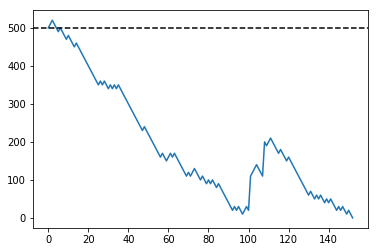

Du spilte 153 ganger før du gikk tom for penger


In [25]:
# Telle variabel
penger = 500

# Liste for å huske resultatene over tid
pengehistorikk = []
pengehistorikk.append(penger)

# Løkke for å gjenta spillet helt til vi går tom for penger
while penger > 0:
    penger += pengespill()
    pengehistorikk.append(penger)

# Plot resultatet
plot(pengehistorikk)
axhline(500, color='black', linestyle='--')
show()
print("Du spilte {} ganger før du gikk tom for penger".format(len(pengehistorikk)))

Når du kjører programmet ser du fra plottet at det er veldig forskjellig hvor lang tid det tar før du går tom for penger. Noen ganger spiller du kanskje 100 ganger, mens andre ganger kanskje 300. Til slutt går du alltid tom for penger. Den stiplede linja er pengene vi begynner med, om den blå kurven går over den stiplede linja betyr det at vi går i pluss. I noen kjøringer ser vi at vi kanskje går en del i pluss - og om man slutter å spille akkurat det er det faktisk mulig å gå i pluss totalt sett, men som vi skjer er det ikke alltid slik. Det er også vanskelig å vite når man skal slutte. 

## Eksempel: Gjettespill

Nå som vi har sett litt på hvordan vi kan generere tilfeldige tall, la oss lage et lite spill. Vi lar først programmet trekke et tilfeldig tall fra 1 til 1000, men den sier det ikke til brukeren. Så må brukeren gjette på tallet, og får beskjed om de gjettet for høyt eller for lavt etter hvert gjett. Programmet holder styr på hvor mange gjett brukeren bruker før de kommer frem til riktig tall.

For å få brukeren til å gi et gjett til programmet bruker vi `input`-kommandoen. Da lager programmet et felt som brukeren kan fylle inn et svar i. Programmet pauser og venter til det får en input fra brukeren før det fortsetter. Det som er litt viktig å huske på med `input` funksjonen er at den vil alltid tolke det brukeren gir som input som *tekst*, det vil si det vi får inn er av typen *tekststreng*, og disse oppfører seg annerledes enn tall. La oss ta et enkelt eksempel:

Vi lager følgende program
```Python
a = input()
b = input()
print(a+b)
```
Dette programmet tar to inputs og legger dem sammen. Om vi først skriver inn `1`, og så `2` som input, så forventer vi nok at programmet skal skrive ut `3` til slutt. Men sånn er det ikke! Bare prøv selv:

In [26]:
a = input()
b = input()
print(a+b)

4
5
45


Dette er fordi `input` tolker det brukeren skriver som tekst, og når man legger sammen tekststrenger bare skjøtes de sammen. Om vi vil at inputen skal tolkes som tall må vi konvertere ved å bruke `int()` eller `float()`, som følger
```Python
a = int(input())
b = int(input())
print(a+b)
```
Tilsvarende så vil ikke `<` eller `>` fungere som vi forventer om vi ikke gjør om brukerens gjett til tall. Dette er fordi `<` og `>` på teksstrenger sammenligner dem *alfabetisk*, og ikke som tall, slik som vi vil.

Nå som vi har skjønnt `input`, la oss skrive programmet:

In [27]:
fasitsvar = randint(1, 1000)
antall_gjett = 0

gjett = int(input("Gjett på et tall mellom 1 og 1000...\n"))
antall_gjett += 1
                  
while gjett != fasitsvar:
    if gjett < fasitsvar:
        gjett = int(input("Ditt gjett ({}) var for lavt, prøv på nytt...\n".format(gjett)))
    elif gjett > fasitsvar:
        gjett = int(input("Ditt gjett ({}) var for høyt, prøv på nytt...\n".format(gjett)))
    antall_gjett += 1
                          
                          
print("Der traff du! {} er riktig svar! Du har brukt {} gjett.".format(gjett, antall_gjett))

Gjett på et tall mellom 1 og 1000...
500
Ditt gjett (500) var for lavt, prøv på nytt...
750
Ditt gjett (750) var for lavt, prøv på nytt...
875
Ditt gjett (875) var for lavt, prøv på nytt...
937
Ditt gjett (937) var for lavt, prøv på nytt...
968
Ditt gjett (968) var for høyt, prøv på nytt...
952
Ditt gjett (952) var for lavt, prøv på nytt...
960
Ditt gjett (960) var for høyt, prøv på nytt...
956
Ditt gjett (956) var for høyt, prøv på nytt...
954
Ditt gjett (954) var for lavt, prøv på nytt...
955
Der traff du! 955 er riktig svar! Du har brukt 10 gjett.


Her kan du jo tenkte litt over hvilke strategi det er best å bruke for å komme frem til riktig svar på færrest mulig gjett. Den beste strategien er *halveringsstrategien*, som vil treffe riktig svar på maks $\log_2(1000)\approx 10$ gjett. 

Etter man har lagd gjettespillet kan man jo snu problemet på hodet. Nå kan man si at brukeren skal bestemme seg for et tall mellom 1 og 1000, og så kan datamaskinen gjette, og så må brukeren si om datamaskinen gjetter for høyt eller lavt. Her kan man bruke `randint()` for å få datamaskinen til å gjette et tall, så må man finne en lur måte for at maskinen skal huske hvilke tall den kan utelukke. Dette er en litt utfordrende oppgave, men det er lett å prøve seg frem og se om man er på rett vei underveis.

## Et par andre tilfeldighetsfunksjoner

Så langt har vi sett hvordan vi kan lage tilfeldige heltall. La oss vise et par andre tilfeldigheter vi kan lage. 

#### Desimaltall mellom 0 og 1
Vi begynner med desimaltall. Om vi kaller på `rand` får vi et et tilfeldig desimaltall mellom 0 og 1.

In [28]:
print(rand())
print(rand())
print(rand())

0.59800531253309
0.11860391885169541
0.7286507526565551


`rand()` kan være en veldig nyttig funksjon fordi vi kan bruke den hver gang det finnes to mulige utfall, uavhengig av hvilke sannsynligheter de to utfallene har. Si for eksempel at vi ser på et Pokémon-spill der Pokémons kan konkurere mot hverandre. Når man bruker et angrep har det en liten sjanse for å være ekstra kraftig, et såkallt *critical hit*.

<img src="https://vignette.wikia.nocookie.net/pokemon/images/3/38/Generation_III_Critical_Hit.png/revision/latest/scale-to-width-down/640?cb=20160924171327" width=450></img>
Kilde: [pokemon.wikia.com](http://pokemon.wikia.com/wiki/File:Generation_III_Critical_Hit.png)

La oss anta det er en 20% sannsynlighet for å treffe en slik critical hit, og 80% sannsynlighet å gjøre et vanlig angrep. Da kan vi bruke `rand()` til å sjekke hva slags angrep vi får som følger:

In [29]:
p = 0.20   # Sannsynlighet for å få critical hit
r = rand() # Tilfeldig tall mellom 0 og 1

if r < p:
    print("A critical hit!")
else:
    print("A normal hit.")

A normal hit.


Her setter vi først `p` til sannsynligheten, som et tall mellom 0 og 1 (ikke som en prosentverdi). Så trekker vi et tilfeldig tall mellom 0 og 1. Hvis det tilfeldige tallet vi trakk, som vi kaller `r`, er mindre enn sannsynligheten, så har vi et ekstra kraftig angrep.

Her tester vi om $r \leq p$, som vil si at `r` må være mindre enn `p`. Hvorfor er det slik og ikke motsatt? For å forstå dette kan vi tegne en tallinje fra 0 til 1. Sannsynligheten `p` deler denne tallinja i to, i verdier mindre enn `p`, og i verdier større enn `p`. Siden vi sier at $r < p$ er et treff, farger vi venstresiden grønn, og høyresiden rød.

<img src="fig/tallinje_sannsynlighet.png" width=400></img>

Når vi trekker et tilfeldig tall med `r = rand()` kan det havne hvor som helst på denne tallinja. Jo større $p$ er, jo større blir venstresiden, og jo større sannsynlighet får vi for at det tilfeldige tallet $r$ havner innenfor det grønne omerådet. I det mest ekstreme er sannsynligheten 100%, da blir $p=1.0$, og alle tilfeldige tall vi trekker gir $r < p$.

Denne metoden lar oss altså sjekke om en tilfeldighet intreffer eller ikke, uansett hvilken sannsynlighet det har for å skje.


#### Desimaltall fra andre intervaller

Noen ganger ønsker vi kanskje desimaltall, men ikke nødvendigvis fra 0 til 1. Kanskje fra -1 til 1, eller fra 0 til 100, eller lignende. Dette kan vi få til med funksjonen `uniform(a, b)`, som gir et uniformt fordelt tall som ligger mellom `a` og `b`. Uniformt fordelt betyr i denne situasjonen at alle de ulike mulighetene er like sannsynlige.

**Eksempel:** Vi ønsker å lage et spill der man skal drive en dyrehagene. Alle dyrene i dyrehagen har en gitt vekt, som vil øke etterhvert som dyrene vokser og spiser. Når det blir født nye dyr, må de få en gitt startvekt, og vi ønsker at denne startvekten skal bli tilfeldig generert. Dette kan være spennende, for startvekten kan for eksempel bestemme hvor mye stell dyrene trenger og hvor fort de vokser. La oss si vi skal finne startvekten til en løvebaby. Et kjapt googlesøk forteller oss at en løvebaby veier typisk 1.5 kg når den blir født. Vi vil ha den variabilitet, så vi bestemmer oss for å trekke en vekt uniformt mellom 0.75 og 3 kg i spillet vårt. Da gjør vi som følger:

In [30]:
fødselsvekt = uniform(0.75, 3.0)
print("Gratulerer! En ny løve er blitt født i parken din! Fødselsvekten er {:.2f} kg.".format(fødselsvekt))

Gratulerer! En ny løve er blitt født i parken din! Fødselsvekten er 1.61 kg.


Kanskje vi også vil skrive ut en advarsel til brukeren om en løvepus veier veldig lite når den blir født

In [31]:
if fødselsvekt < 1.0:
    print("Advarsel: Den nye løveungen har en unormalt lav fødselsvekt og kan trenge ekstra oppfølgning fra vetrinæren!")

### Å gjøre utvalg med og uten tilbakelegging

La oss si vi har 5 personer, og vi skal plukke ut en heldig vinner som skal få kinobilletter. Dette ville vi vanligvis gjort ved å trekke lodd. For å gjøre dette i Python lager vi først en liste over de 5 personene, så bruker vi funksjonen `choice`, som trekker et tilfeldig element fra en liste




In [32]:
personer = ["Anders", "Beate", "Christine", "Daniel", "Erika"]
vinner = choice(personer)
print(vinner)

Beate


*Choice* betyr "valg", på engelsk, og det funksjonen er å velge ett element tilfeldig. Dette kaller vi gjerne et *utvalg*.

Kanskje vi har to premier å gi bort, da ønsker vi å velge to vinnere og gjør dette ved å sende antallet som et ekstra argument: `choice(personer, 2)`. Når vi trekker flere elementer fra en mengde kan vi gjøre dette *med* eller *uten* tilbakelegging. Tenk deg at vi har en bolle med en papirlapp med hvert navn på. Om vi trekker en lapp, og ikke legger den tilbake før vi trekker neste, så kan ikke én person vinne begge premiene. Om vi derimot legger tilbake lappen før vi trekker igjen, så er det mulig at vi treffer samme lapp begge ganger.

Funksjonen vi bruker, `choice`, er vanligvis utvalg *med* tilbakelegging.

In [33]:
vinnere = choice(personer, 2)
print(vinnere)

['Anders' 'Anders']


Fordi `choice` er med tilbakelegging vil du kunne få et resultat hvor begge premiene går til samme person. Om vi ønsker å unngå dette må vi trekke *uten tilbakelegging*. Funksjonen `choice` kan få til dette også, men da må vi settet `replace` til falskt. Replace er engelsk å betyr å erstatte eller legge tilbake, så `replace=False` betyr at vi *ikke vil ha tilbakelegging*.

In [34]:
vinnere = choice(personer, 2, replace=False)
print(vinnere)

['Daniel' 'Beate']


**Tenkespørsmål:** Hvis du prøver `choice(personer, 6)` fungerer dette fint, men `choice(personer, 6, replace=False)` fungerer ikke. Hvorfor fungerer den ene, men ikke den andre?

**Eksempeloppgave**

Vi har en pose med 20 røde baller og 30 blå baller. Hvis vi trekker 10 baller fra sekken, uten tilbakelegging, hva er sannsynligheten for å trekke minst to baller av hver farge?

In [35]:
antall_simuleringer = 1000
baller = ["rød"]*20 + ["blå"]*30

gunstige_simuleringer = 0
for trekkning in range(antall_simuleringer):
    utvalg = choice(baller, 10, replace=False)
    
    # Telle antall av hver farge
    røde_baller = 0
    blåe_baller = 0
    for ball in utvalg:
        if ball == "rød":
            røde_baller += 1
        else:
            blåe_baller += 1
    
    # Sjekke om vi har minst 3 av hver
    if røde_baller >= 3 and blåe_baller >= 3:
        gunstige_simuleringer += 1
    
print("{:.1%}".format(gunstige_simuleringer/antall_simuleringer))

84.6%


### Stokke en kortstokk

La oss si vi vil lage et kortspill på datamaskin. Da trenger vi en måte å stokke kortstokken, heldigvis finnes dette, funksjonen `shuffle()` tar en liste og stokker om på den, så rekkefølgen er helt tilfeldig.

La oss først lage en kortstokk. Vi lar en kortstokk være en liste der hvert element er et kort. Et kort i en kortstokk har to egenskaper: farge (fargene er ruter/hjerter/spar/kløver, ikke rød/svart) og valør (tallverdi). Istedet for å skrive ut alle 52 kortene i en kortstokk kan vi bruke *to* løkker for å lage en kortstokk som følger:

In [36]:
# Lager en tom stokk
kortstokk = []

# Løkke over alle farger og valører. Det skal finnes nøyaktig ett kort per kombinasjon av valør og farge
for farge in ("Ruter", "Hjerter", "Spar", "Kløver"):
    for valør in (2, 3, 4, 5, 6, 7, 8, 9, 10, "Knekt", "Dame", "Konge", "Ess"):
        # Legg til kortet til kortstokken
        kortstokk.append((farge, valør))

# Sjekke at det ble 52 kort        
print(len(kortstokk))

# Skriv ut de første 5 kortene i stokken
for i in range(5):
    print(kortstokk[i])

52
('Ruter', 2)
('Ruter', 3)
('Ruter', 4)
('Ruter', 5)
('Ruter', 6)


Vi har altså lagd en kortstokk med 52 kort, men vi ser at den er i samme rekkefølge som vi lagde løkkene våre i. De fleste kortspill ville vært fryktelig kjedlige om vi ikke stokker kortstokken. Når vi har en liste med elementer kan vi stokke om på rekkefølgen med `shuffle` (shuffle er engelsk og betyr å stokke om på)

In [37]:
shuffle(kortstokk)

Når vi kaller `shuffle(kortstokk)` stokkes lista vår om på. Om vi nå skriver ut de første 5 kortene i lista for eksempel, vil vi se at den er godt stokket


In [38]:
for kort in kortstokk[:5]:
    print(kort)

('Spar', 3)
('Spar', 'Knekt')
('Ruter', 7)
('Kløver', 9)
('Spar', 8)


Nå har vi altså en kortstokk og en måte å stokke den, og det er et veldig godt grunnlag for å lage et kortspill! En nyttig funksjon å bruke kan da være at `kortstokk.pop(0)` trekker det øverste (det 0'te) kortet i kortstokken. Det vil si at kortet returneres fra funksjonskallet, og kortet fjernes fra kortstokken.

La oss for eksempel si at vi skal lage et pokerspill. I for eksempel Texas Hold'em får hver spiller 2 kort. La oss si vi har 5 spillere. Da kan vi dele ut starthender som følger:

In [39]:
# Opprette tomme hender for å oppbevare kortene som trekkes
hender = []

# Vi skal dele ut to kort til hver spiller
for spiller in range(5):   
    hånd = []
    hånd.append(kortstokk.pop(0))
    hånd.append(kortstokk.pop(0))
    hender.append(hånd)
    
# Skriv ut hendene til slutt
for spiller in range(5):
    print(hender[spiller])

[('Spar', 3), ('Spar', 'Knekt')]
[('Ruter', 7), ('Kløver', 9)]
[('Spar', 8), ('Ruter', 5)]
[('Kløver', 'Konge'), ('Hjerter', 'Knekt')]
[('Spar', 2), ('Kløver', 'Dame')]


**Forslag til prosjekt:** Som et programmeringsprosjekt kan man her utfordre elevene til å lage kortspillet Krig på datamaskin. Dette er et av de enkleste kortspillene å implementere, spesielt siden det bare er to spillere. Her kan man først lage et spill der en person spiller mot datamaskinen, så kan man lage en versjon der to personer spiller mot hverandre. Et slikt prosjekt er ganske motiverende for noen elever, som syns det er veldig morsomt å lage spill på datamaskin. Derimot er det kanskje ikke like mye faglig relevans i et slikt opplegg, men man kan lære masse god programmering av det!

# Store Talls lov

Vi skal nå bruke det vi har lært så langt til å se på *store talls lov*. Store talls lov sier at når antallet tilfeldige forsøk blir stort, så vil fordelingen nærme seg sannsynligheten. Si vi for eksempel gjør myntkast med en helt rettferdig mynt, det vil si en som har 50% sannsynlighet for å lande på den ene side, og 50% for å havne på den andre. Om vi for eksemel kaster 10 ganger på rad, så er det langt fra umulig å for eksempel få en fordeling på 3/7, som tilsier at sannsynlighetene er 30%/70%! Om vi derimot kaster 1000 ganger, vil det bli langt vanskligere å få en 30%/70% fordeling i store talls lov, for det ville krevd at vi kastet 300 kron og 700 mynt, som er usannsynlig. Det er altså vanskligere å havne langt unna de faktiske sannsynlighetene når vi gjentar forsøket mange ganger.

La oss se på dette, vi bruker myntkast funksjonen vi lagde på starten av notebooken:

In [40]:
def sammenligne_kron_og_mynt(antall_kast):
    kron, mynt = mange_myntkast(antall_kast)
    print("{} kron ({:.1%})  |  {} mynt ({:.1%}).".format(kron, kron/antall_kast, mynt, mynt/antall_kast))

Vi prøver først noen ganger med 10 kast, så noen ganger med 1000, så noen ganger med 1 million kast. Når vi kaster så mange ganger kan det være det begynner å gå litt tregt når vi kjører koden, men den kommer i mål til slutt.

In [41]:
sammenligne_kron_og_mynt(10)
sammenligne_kron_og_mynt(10)
sammenligne_kron_og_mynt(10)
sammenligne_kron_og_mynt(10)
sammenligne_kron_og_mynt(10)

3 kron (30.0%)  |  7 mynt (70.0%).
4 kron (40.0%)  |  6 mynt (60.0%).
7 kron (70.0%)  |  3 mynt (30.0%).
7 kron (70.0%)  |  3 mynt (30.0%).
5 kron (50.0%)  |  5 mynt (50.0%).


In [42]:
sammenligne_kron_og_mynt(1000)
sammenligne_kron_og_mynt(1000)
sammenligne_kron_og_mynt(1000)
sammenligne_kron_og_mynt(1000)
sammenligne_kron_og_mynt(1000)

507 kron (50.7%)  |  493 mynt (49.3%).
512 kron (51.2%)  |  488 mynt (48.8%).
511 kron (51.1%)  |  489 mynt (48.9%).
468 kron (46.8%)  |  532 mynt (53.2%).
527 kron (52.7%)  |  473 mynt (47.3%).


In [43]:
sammenligne_kron_og_mynt(1000000)
sammenligne_kron_og_mynt(1000000)
sammenligne_kron_og_mynt(1000000)
sammenligne_kron_og_mynt(1000000)
sammenligne_kron_og_mynt(1000000)

500178 kron (50.0%)  |  499822 mynt (50.0%).
500339 kron (50.0%)  |  499661 mynt (50.0%).
500460 kron (50.0%)  |  499540 mynt (50.0%).
499995 kron (50.0%)  |  500005 mynt (50.0%).
499511 kron (50.0%)  |  500489 mynt (50.0%).


Vi ser at jo flere kast vi gjør, jo sikrere blir vi på at utfallet ligger nærme den faktiske sannsynligheten på 50%. Det er dette som er store talls lov.

#### En mynt har ingen hukommelse

Hvor kommer store talls lov fra? Hva er det som gjør at det i det lange løp vil utligne seg på 50%? Dette er et spørsmål det er vanskelig å svare på, for oss mennesker er ikke så veldig flinke på det å tenkte på sannsynligheter og tilfeldighet.

En veldig vanlig ting å tenke, er at mynten *husker* hva som har skjedd. Om vi for eksempel driver med myntkast, og har fått 5 kron på rad, er det veldig lett å tenke at det nesten må være mer sannsynlig at neste kast blir mynt, for vi må jo veie opp for at det ble så mye kron. Men sånn er det ikke! En mynt har ingen hukommelse, og hver gang vi kaser er det 50/50% for å få kron og mynt, selv om vi kanskje har nettopp kastet 10 kron på rad, er det like sannsynlig å få kron på neste kast som en mynt.

Dette gjelder også for terningkast. Om man har kastet en terning 20 ganger uten å få en eneste 6'er tenker man fort nå **må** det jo komme en 6-er snart, men terningen har heller ingen hukkomelse, og selv etter en lang periode uten en 6'er, er det akkurat like sannsynlig å rulle de andre tallene på terningen.

Denne tankegangen er altså feil, men utrolig vanlig, og den har fått navnet *Gambler's fallacy* på engelsk, en *fallacy* er en tankefeil eller feilslutning, så det kan oversettes som Gamblerens tankefeil. 

#### Monte Carlo i 1913
(Kilde: Du kan lese mer om denne historien for eksempel i [denne BBC artikkelen](http://www.bbc.com/future/story/20150127-why-we-gamble-like-monkeys).)

Det er et veldig kjent eksempel av Gamblerens tankefeil fra et casio i Monte Carlo i 1913. Ved et rulettbord rulles en liten kule rundt i et ruletthjul, og havner tilfeldig på et tall fra 0 til 36. Med unntak av 0, som er grønn, er det like mange rød og svarte felter. Man kan sette penger på om kula lander på rød eller svart på neste spinn. Det som skjedde i 1913 var at et av Casionets ruletthjul begynnte å treffe veldig mange svare på rad. 

<img src="https://c1.staticflickr.com/6/5281/5276348473_a7a284aa3d_b.jpg" width=300></img>
(Kilde: [Håkan Dahlström](https://www.flickr.com/photos/dahlstroms/5276348473) under [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/))

Etterhvert som det kom fler og fler svarte på rad begynnte fler og fler å samle seg rundt hjulet og mange trodde at det *måtte* dukke opp en rød snart! Folk var så sikre på dette at de var villige til å sette alle pengene sine på rød, noen satset flere millioner! Det kom hele 26 svarte baller på rad, før det til slutt kom en rød ball. Innen den røde ballen dukket opp hadde de fleste allerede spilt fra seg alle pengene sine. De ble lurt av magefølelsen til å tro at den rød ballen var mer sannsynlig, men det er den ikke. Et rulletthjul, akkurat som en mynt, har ingen hukommelse.


### Hvorfor fungerer Store Talls Lov?

Men hvis en mynt, eller et rulletthjul, ikke har noen hukommelse - hvorfor virker store talls lov? Om hjulet havnet på svart 26 ganger på rad, men det ikke kommer noen flere røde etterpå, vil det ikke da være flere svarte enn røde baller til slutt, altså ikke en 50/50 fordeling slik store talls lov sier?

For å forstå dette er det viktig å lese veldig nøye hva store talls lov sier. Store talls lov sier at forholdet vil nærme seg *sannsynligheten*. Vi forventer altså at vi får 50% mynt og 50% kron. Dette er *ikke* det samme som å si at vi skal få like mange kron og mynt! "Hæ
?" Sier du kanskje nå, hvis vi får 50% mynt og 50% kron, hvordan kan det ikke være like mange av dem?

Hvis du går tilbake til der du flippet først 10 mynter, så 1000, så 1000000. Se på *avviket* fra perfekt fordeling. Når vi flippet 10 mynter ser vi avvik på 0-3. Det vil si at vi forventer en fordeling på 5 kron og 5 mynt, men det skjer av og til at vi f.eks får 8 kron og 2 mynt. Om vi ser på avvikene vi får når vi flipper 1000 mynter ser vi at disse er på ca 20. Som vil si at vi forventer å få ca 500/500, men vi ser vi kan lett får 480 kron og 520 mynt. For en million kast ser vi avvik på 500-1000 fra den perfekte fordelingen.

Vi ser altså at når vi kaster fler og fler mynter så vil avviket fra den perfekte fordelingen bli større og større. Jo fler mynter du kaster, jo mindre sannsynlig er det å få nøyaktig like mange kron og mynt. Men, når du ser på sannsynligheten, så er historien helt annerledes. Vi ser at sannsynligheten blir nærmere og nærmere 50%! Hva er det som foregår her?

#### Litt Matematikk for å forklare oppførselen
(Denne forklaringen er helt klart for voldsom for ungdomsskolen, og er mest ment til lærere. Men du får gjøre en vurdering på om det finnes en noe enklere forklaring av dette du kan gå igjennom i klasserommet. Tallene fra simuleringen snakker jo litt for seg selv, så man kan jo for eksempel bare beskrive "mønsteret" som dukker opp i tallene.)

La oss gi kron verdien -1, og mynt verdien 1. (Du kan tenke deg at du spiller om 1 kron per kast). Siden vi forventer å få like mange av dem, så kommer den totale fortjenesten til å ligge på 0 kroner. Men som vi har sett vil avviket fra denne perfekte fordelingen (akkurat 0 kroner) øke over tid. Vi kan vise, ved hjelp av litt fancy matematikk, at vi kommer til å forvente et avvik på opp til $\sqrt{n}$ etter $n$ kast. Så for 10, 1000 og 1000000 kast vil vi typisk forvente å se utslag på
$$\begin{align*}
\sqrt{10} &\approx 3 \\
\sqrt{1000} &\approx 32 \\
\sqrt{1000000} &= 1000
\end{align*}
$$
Så etter en million kast kan vi fort ligge opptil 1000 kroner i pluss eller i minus, men noe særlig mer enn dette er veldig usannsynlig.

Men *sannsynligheten* er gitt ved å dele på antall kast, så hvis vi forventer et avvik på opptil 3 kast, betyr dette vi har et avvik på $\frac{3}{10} \approx 0.3$ i sannsynligheten, hele 30%! For 1000 kast derimot, har vi et avvik på opptil 32, som gir et avvik på opptil $\frac{32}{1000} \approx 0.032$, det vil si 3.2%. Mye lavere. Til slutt har vi en million kast, som gir oss avik på $1000/1000000 = 0.001$, så lite som 0.1%!

For å ta det på et litt avansert nivå: Helt generelt får vi at avviket i antall kron og mynt er $\sqrt{n}$, som vokser med antall kast, mens avviket i sannsynligheten vil være opptil $\sqrt{n}/n = 1/\sqrt{n}$. Og siden $\sqrt{n}$ øker med antall kast $n$, så vil $1/\sqrt{n}$ minske.

### Plotte Store talls lov

Vi kommer nå til å simulere myntkast igjen, men denne gangen skal vi plotte resultatene. Denne biten viser vi bare som eksempel, det blir nok litt mye for elevene å skjønne. Her kan du for eksempel kjøre dette på din egen maskin, og så vise resultatene og diskutere og tolke det sammen med elevene.

Nå kaster vi mynt mange ganger, og lar mynt ha verdi -1 og kron 1. Vi plotter både totalverdien vi har over tid, men også sannsynligheten/fordelingen av kron og mynt vi har fått.

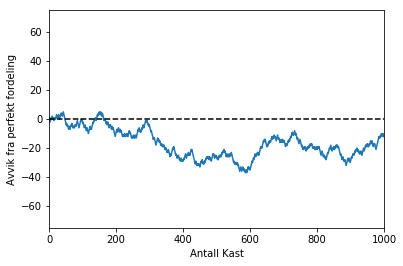

In [44]:
antall_kast = 1000
verdi = 0
historikk = []

for kast in range(antall_kast):
    verdi += 2*randint(2) - 1 # Vi gjør dette for å får -1 eller 1, istedenfor 0 eller 1
    
    # Ta vare på verdiene for plotting
    historikk.append(verdi)
    
plot(historikk)
xlabel('Antall Kast')
ylabel('Avvik fra perfekt fordeling')
axhline(0, linestyle='--', color='black')
axis((0, 1000, -75, 75))
show()

Om vi kjører denne kodesnutten mange ganger ser vi at kurven kan se veldig forskjellig ut. Noen ganger holder den seg veldig nær 0, og andre ganger går den et godt stykke ut til sidene. Vi ser derimot at de aller fleste holder seg innenfor rammene på figuren, som her er satt til et maks avvik på 75.

Vi kan få en bedre forståelse av oppførselen ved å tegne mange slike kurver over hverandre. Det vi gjør nå er å plotte 1000 slike kurver over hverandre. Det blir fort veldig kaotisk, men om vi gjør kurvene nesten helt gjennomsiktige samtidig vår vi litt nyttig informasjon. Der det bare er en kurve i figuren, vil den være tilnærmet helt gjennomsiktig, mens om det er mange kurver som overlapper på samme sted, så vil de legges sammen og vi får en sterkere fargen. Fargen sier altså noe om hvor mange kurver som er der, og dermed noe om sannsynlighetsfordelingen. I tilegg tegner vi på standardavviket, som vi mente var gitt ved $\sqrt{n}$.

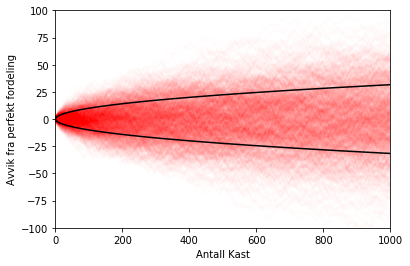

In [45]:
antall_kast = 1000
antall_kurver = 1000

# Ta vare på alle verdiene for alle kurvene
historikk = np.zeros((antall_kast+1, antall_kurver))

# To løkker: En over kastene, og en over kurvene
for kast in range(antall_kast):
    for kurve in range(antall_kurver):
        historikk[kast+1, kurve] = historikk[kast, kurve] + 2*randint(2) - 1  # Vi gjør dette for å få -1 eller 1, istedenfor 0 eller 1

plot(historikk, alpha=0.01, color='red')

# Tegn på standardavvik
x = arange(antall_kast+1)
plot(x, sqrt(x), color='k')
plot(x, -sqrt(x), color='k')
xlabel('Antall Kast')
ylabel('Avvik fra perfekt fordeling')
axis((0, 1000, -100, 100))
show()

Her er de svarte kurvene standardavviket, mens de rød kurvene er de forskjellige eksperimentene. Vi ser at fargen starter heldt rød mot venstre side, siden her har vi ikke kastet nok ganger til å få noe særlig varians, men jo fler kast vi gjør, jo mer deler de seg. Samtidig ser vi at de fleste av kurvene holder seg innenfor standardavviket, og tilnærmet ingen beveger seg utenfor et avvik 75. 

For å forstå store talls lov må vi nå sammenligne x-aksen og y-aksen. For x-aksen går til 1000 kast, mens på y-aksen ser vi at avvikene er begrenset til under hundre. Når x blir større og større så vil y vokse, men mye tregere enn x-aksen. Derfor øker antall kast raskere enn avviket, og gjennomsnittet/prosenten går mot sannsynligheten - slik store talls lov sier.

#### Eksempel: Spørreundersøkelser

Når det er valgår blir det stadig publisert nye partibarometer som prøver å si hva folk kommer til å stemme. Disse gjøres ved å spørre en liten del av befolkning. Hvis vi velger tilfeldige mennesker til å delta i undersøkelsen, så vil de vi spør mest sannsynlig være representative for hele norges befolkning. Men hvor mange må vi spørre for å være rimelig sikre på resultatet?

Dette er et eksempel på store talls lov, og akkurat som for eksempelet vi så på med myntkast vil avviket fra den faktiske fordelingen bli mindre jo fler vi spør. Det er alltid viktig å se på antall spurte i en spørreundersøkelse for å skjønne hvor sikre vi kan være på at resultatene faktisk er sanne, og ikke bare en tilfeldighet. På en seriøst spørreundersøkelse bør det stå antall deltakere og feilmargin. Feilmarginen er regnet ut ved hjelpe av matematikk og sier noe om hva som er en rimelig feil å anta det finnes grunnet antall deltakere.

For eksempel står det på et partibarometer på NRK sine nettsider:
```
Partibarometer, februar 2018
Norstat for NRK. Periode 30/01–05/02. 943 intervjuer. Feilmarginer fra 0,9–3,4 pp.
```
I denne undersøkelsen spurte de 943 hva de ville stemme om det var valg imorgen. Basert på denne kommer man frem til at det er rimelig at resultatene er 0.9-3.4 prosentpoeng feil. Altså vil vi ikke forvente at noen av oppsluttningene er 5% eller mer feil, for dette holder det med 1000 personer, men 3% er fortsatt ganske mye når det kommer til partioppslutning, på grunn av dette vil det ofte være ganske store forskjeller i partibarometre, selv om de er tatt på akkurat samme tidspunkt.

**Tankespørsmål:** Når vi kastet 1000 mynter kunne vi forvente en feil i sannsynligheten på opptill ca 3%. Hvorfor tror du denne %-en er så nær feilen NRK oppgir for sin spørreundersøkelse?


# Prosjektoppgave: Monty Hall Problemet

Monty Hall problemet er en veldig kjent mattenøtt med et veldig overraskende svar. Det er et problem som fører til mye engasjement og diskusjon, og har selv en spennende historie der diskusjon rundt matematikk ble satt på dagsorden i hele USA.

Monty Hall problemet er et flott problem å bruke i Matematikkundervisningen, da det fører til god diskusjon rundt sannsynlighet og tilfeldighet. Det er også fullt mulig å simulere spillet i klasserommet for å teste om intuisjonen til elevene stemmer, noe den ofte ikke gjør. Ved å simulere *manuelt* kan man enkelt gjennomføre spillet et par hundre ganger, men vi kan også simulere på datamaskin for å få langt flere simuleringer. Dette gjør Monty Hall problemet til en mulig prosjektoppgave, gruppearbeid eller kanskje et tema for en fagdag.

Vi starter her med å presentere problemet og hvor det kommer fra. Deretter går vi gjennom noen mulige forklaringer av løsningen før vi til slutt dekker hvordan spillet kan simuleres både manuelt og ved hjelp av programmering.

### Problemets historie

Problemet ble formulert og løst allerede i 1975, men ble ikke allment kjent på dette tidspunktet. Det var først når problemet ble formulert på nytt og sendt til *Ask Marilyn* i 1990 at ting virkelig tok av. *Ask Marilyn* er en kolonne i *Parade magazine* der Marilyn vos Savant besvarer diverse matematiske nøtter og logiske utfordringer. Vos Savant er kjent for å ha blitt kåret til den høyeste målte IQen av Guinnes rekordbok.
<img src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Marilyn_vos_Savant.jpg" width=100>
(Marilyn vos Savant Kilde: [Wikimedia Commons](https://en.wikipedia.org/wiki/Marilyn_vos_Savant#/media/File:Marilyn_vos_Savant.jpg))

##### Problemets formulering

Se for deg at du er på et gameshow, og du får velge mellom tre dører: Bak én av dem er en bil; bak de andre, geiter. Du velger en dør, for eksempel nummer 1. Verten, som vet hva som er bak dørene, åpner en av de andre dørene, for eksempel nummer 3, som har en geit. Han sier nå til deg, "Har du lyst å bytte til dør 2?". Er det til din fordel å bytte dør?

(Dette er den originale formuleringen av problemet publisert i *Parade* i 1990, oversatt til norsk.)


<img src="fig/doors_open.png" width=600>

Problemet er kjent som *Monty Hall* problemet da Monty Hall var en kjent gameshowvert på denne tiden.

##### Debatten

Marilyn besvarte spørsmålet helt korrekt i sin kolonne. Men kort tid etter at problemet og svarer ble publisert fikk *Parade* en enorm mengde leserbrev i protest og både lekfolk og fagfolk var skråsikre på at hun tok feil - noen gikk så langt som å beskylde henne for å drive med vranglære og for å aktivt ødelegge for matematikkundervisning i USA. Dette førte til at Marilyn måtte returnere til det samme spørsmålet ved flere anledninger og komme med mer detaljerte forklaringer. På [Marilyn's egne nettside](http://marilynvossavant.com/game-show-problem/) kan dere lese de originale svarene Marilyn skrev, samt noen av brevene *Parade* mottok i protest og støtte.

##### Trumfkortet

Debatten rundt spørsmålet fortsatte helt til Marilyn til slutt spurte om hjelp fra skoleklasser over hele USA til å rett og slett *gjøre* simuleringer for å komme frem til svaret. Kort tid etter var det gjort nok forsøk og empirisk innsamling til å bekrefte at Marilyns svar var helt rett hele tiden. 


### Å simulere én runde

Vi skal nå gjenta eksperimentet til Marilyn. Først gjør vi dette ved å simulere Monty Hall problemet for hånd. Etter vi har gjort dette går vi over til å gjøre det ved hjelp av programmering. Målet er å gjennomføre en million eller flere eksperimenter, så vi kan være sikre på at vi har funnet riktig svar.

#### Simulere Monty Hall i klasserommet med terning

Vi kan simulere Monty Hall problemet med 3 pappkopper og et lite objekt som kan legges under en kopp, for eksempel en liten ball, en sammenrullet papirbit, en liten stein, eller hva som helst annet.

To personer samarbeider om simuleringen, den ene er verten og den andre deltakerene. Først skjuler verten objektet under en av de tre koppene uten at deltakeren ser det. Deretter velger deltakeren en av de tre koppene. Verten løfter nå koppen og viser at objektet ikke er der. Deltakeren kan nå velge om de vil bytte eller ikke.

Når vi skal simulere Monty Hall problemet mange ganger for å finne sannsynligheter, er det viktig at vi er objektive. For eksempel må vi passe på at vi ikke faller inn i mønstre fordi vi begynner å kjede oss og slikt. Vi skal derfor bruke terninger. 

Kall de tre koppene 'A', 'B' og 'C'. Først ruller verten en terning, om det blir 1 eller 2 er premien under A, om det blir 3 eller 4 er det under B og om det blir 5 eller 6 legges premien under C. Deretter ruller deltakeren for hvilken han eller hun gjetter på etter samme system. Etter gjettet viser verten en kopp uten en premie under. Spill 10 ganger der man velger å bli, og 10 ganger der man velger å bytte. Hva er resultatet?

####  Simulere Monty Hall med programmering

Vi skal nå lage et program som kan simulere Monty Hall problemet. Vi starter med å lage et program som spiller én runde. Vi må være sikre på at denne versjonen fungerer som den skal før vi går videre til å simulere en lang rekke spill etterhverandre. Vi skriver ut informasjon for hvert steg i prosessen for å se at alt går riktig for seg.

In [46]:
# Hvilken strategi bruker vi, bytte eller bli?
strategi = "bytte"

# Hvilken dør er premien bak?
dører = ["A", "B", "C"]
fasit = choice(dører)
print("Premien er bak dør: {}".format(fasit))

# Plukk en dør tilfeldig
førstevalg = choice(dører)
print("Dør {} blir valgt.".format(førstevalg))

# Verten viser frem en av dørene vi ikke har valgt, og viser at det er en geit
shuffle(dører)
for dør in dører:
    if dør != førstevalg:
        if dør != fasit:
            geit_dør = dør
            print("Verten viser frem en geit bak dør", geit_dør)
            break

# Vil vi bytte dør?
if strategi == "bytte":
    for dør in dører:
        if dør != førstevalg and dør != geit_dør:
            endelig_valg = dør
            print("Du byttet til dør {}.".format(endelig_valg))
else:
    endelig_valg = førstevalg
    print("Du valgte å bli på dør {}".format(endelig_valg))

# Sjekk om vi vinner
if endelig_valg == fasit:
    print("Du vant bilen!")
else:
    print("Du fikk en geit denne gangen")

Premien er bak dør: A
Dør C blir valgt.
Verten viser frem en geit bak dør B
Du byttet til dør A.
Du vant bilen!


#### Mange simuleringer

Nå som vi har fått til å simulere en runde med Monty Hall problemet gjenstår det kun å skrive om litt slik at vi kan gjennomføre andelen spill, og finne sannsynligheten for å vinne med de ulike strategiene. Vi lager en funksjon og bruker en løkke.

In [47]:
def montyhall(strategi):
    dører = ["A", "B", "C"]
    fasit = choice(dører)

    førstevalg = choice(dører)

    shuffle(dører)
    for dør in dører:
        if dør != førstevalg:
            if dør != fasit:
                geit_dør = dør
                break

    if strategi == "bytte":
        for dør in dører:
            if dør != førstevalg and dør != geit_dør:
                endelig_valg = dør        
    else:
        endelig_valg = førstevalg
    
    if endelig_valg == fasit:
        return 1
    else:
        return 0

In [48]:
print(montyhall('bytte'))
print(montyhall('bytte'))
print(montyhall('bytte'))

0
1
0


In [49]:
strategi = 'bytte'
antall_simuleringer = 1000000
antall_seire = 0

for runde in range(antall_simuleringer):
    antall_seire += montyhall(strategi)

# For hver runde så enten vinner vi, eller så taper vi så vi vet at
antall_tap = antall_simuleringer - antall_seire
    
print("Du spiller med strategien: {}".format(strategi))
print("Du spilte {} antall runder.".format(antall_simuleringer))
print("Du vant {} runder ({:.1%})".format(antall_seire, antall_seire/antall_simuleringer))
print("Du tapte {} runder ({:.1%})".format(antall_tap, antall_tap/antall_simuleringer))

Du spiller med strategien: bytte
Du spilte 1000000 antall runder.
Du vant 666471 runder (66.6%)
Du tapte 333529 runder (33.4%)
